In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
from matplotlib.image import NonUniformImage
import itertools
import matplotlib

In [2]:
#import the root file
tracks = uproot.open('/share/lazy/tboettch/BsPhiPhi_VeloUT_MCMatch_TrueTraj.root')['tracks']

#extract the different arrays from the file
arr = tracks.arrays([b'pt',b'p',b'eta',b'tx',b'ty',b'ox',b'oy',b'oz',b'rec_scifi',b'ut_p',b'scifi_p',b'q',b'long',b'velo_x',b'velo_y',b'velo_z',
                     b'ut_x0',b'ut_z0',b'ut_dxdy',b'ut_ymin',b'ut_ymax',b'scifi_x0',b'scifi_z0',b'scifi_dxdy',b'scifi_ymin',b'scifi_ymax',b'true_traj_x',
                     b'true_traj_y',b'true_traj_z', b'pid'])

#create individual Python arrays for each set of information
p = arr[b'p']
charge = arr[b'q']
rec_scifi = arr [b'rec_scifi']
pt = arr[b'pt']
tx_i = arr[b'tx']
ty_i = arr[b'ty']
x_traj = arr[b'true_traj_x']
y_traj = arr[b'true_traj_y']
z_traj = arr[b'true_traj_z']
velo_x = arr[b'velo_x']
velo_y = arr[b'velo_y']
velo_z = arr[b'velo_z']
ut_x0 = arr[b'ut_x0']
ut_z0 = arr[b'ut_z0']
scifi_x0 = arr[b'scifi_x0']
scifi_z0 = arr[b'scifi_z0']
ut_ymin = arr[b'ut_ymin']
ut_ymax = arr[b'ut_ymax']
scifi_ymax = arr[b'scifi_ymax']
scifi_ymin = arr[b'scifi_ymin']
ut_dxdy = arr[b'ut_dxdy']
scifi_dxdy = arr[b'scifi_dxdy']
long = arr[b'long']
scifi_p =  arr[b'scifi_p']
pid = arr[b'pid']


In [139]:
#select tracks based on specific conditions

p_l = 10000.
p_u = 5000.
t = -1

p1 = [p[x] for x in range(len(p)) if (charge[x] == t and p_l < p[x] < p_u) ]
rec_scifi1 = [rec_scifi[x] for x in range(len(p)) if (charge[x] == t and p_l < p[x] < p_u) ]
pt1 = [pt[x] for x in range(len(p)) if (charge[x] == t and p_l < p[x] < p_u) ]
tx_i1 = [tx_i[x] for x in range(len(p)) if (charge[x] == t and p_l < p[x] < p_u) ]
ty_i1 = [ty_i[x] for x in range(len(p)) if (charge[x] == t and p_l < p[x] < p_u) ]
x_traj1 = [x_traj[x] for x in range(len(p)) if (charge[x] == t and p_l < p[x] < p_u) ]
y_traj1 = [y_traj[x] for x in range(len(p)) if (charge[x] == t and p_l < p[x] < p_u) ]
z_traj1 = [z_traj[x] for x in range(len(p)) if (charge[x] == t and p_l < p[x] < p_u) ]
velo_x1 = [velo_x[x] for x in range(len(p)) if (charge[x] == t and p_l < p[x] < p_u) ]
velo_y1 = [velo_y[x] for x in range(len(p)) if (charge[x] == t and p_l < p[x] < p_u) ]
velo_z1 = [velo_z for x in range(len(p)) if (charge[x] == t and p_l< p[x] < p_u) ]
ut_x01 = [ut_x0[x] for x in range(len(p)) if (charge[x] == t and p_l < p[x] < p_u) ]
ut_z01 = [ut_z0[x] for x in range(len(p)) if (charge[x] == t and p_l < p[x] < p_u) ]
scifi_x01 = [scifi_x0[x] for x in range(len(p)) if (charge[x] == t and p_l < p[x] < p_u) ]
scifi_z01 = [scifi_z0[x] for x in range(len(p)) if (charge[x] == t and p_l < p[x] < p_u) ]
ut_ymin1 = [ut_ymin[x] for x in range(len(p)) if (charge[x] == t and p_l < p[x] < p_u) ]
ut_ymax1 = [ut_ymax[x] for x in range(len(p)) if (charge[x] == t and p_l < p[x] < p_u) ]
scifi_ymax1 = [scifi_ymax[x] for x in range(len(p)) if (charge[x] == t and p_l < p[x] < p_u) ]
scifi_ymin1 = [scifi_ymin[x] for x in range(len(p)) if (charge[x] == t and p_l < p[x] < p_u) ]
ut_dxdy1 = [ut_dxdy[x] for x in range(len(p)) if (charge[x] == t and p_l < p[x] < p_u) ]
scifi_dxdy1 = [scifi_dxdy[x] for x in range(len(p)) if (charge[x] == t and p_l < p[x] < p_u) ]
long1 = [long[x] for x in range(len(p)) if (charge[x] == t and p_l < p[x] < p_u) ]
scifi_p1 = [scifi_p[x] for x in range(len(p)) if (charge[x] == t and p_l < p[x] < p_u) ]
pid1 = [pid[x] for x in range(len(p)) if (charge[x] == t and p_l < p[x] < p_u) ]


In [13]:
# for efficiencies based on position
# replace z_position with a value of z in millimeters
d = []
e = []
for i in range(len(z_traj1)):
    for z in range(len(z_traj1[i])):
        if round(z_traj1[i][z], -2) == z_position:
            d.append(i)
            e.append(z)

#select conditions for efficiency
#here, long tracks are the denominator and long tracks reconstructed with SciFi hits (rec_scifi1 == 1) are the numerator
x_all = []
x_acc = []
y_all = []
y_acc = []
for i,z in zip(d,e):
    if long1[i] == 1:
        x_all.append(x_traj1[i][z])
        y_all.append(y_traj1[i][z])
        
    if long1[i] == 1 and rec_scifi1[i] == 1:
        x_acc.append(x_traj1[i][z])
        y_acc.append(y_traj1[i][z])
        

In [110]:
# for momentum resolution
            
p_diff = []
p_all = []
for i in range(len(rec_scifi1)):
    if rec_scifi1[i] == 1:
        p_diff.append((scifi_p1[i] - p1[i])/p1[i])
    
p_diff = np.array(p_diff).T

        

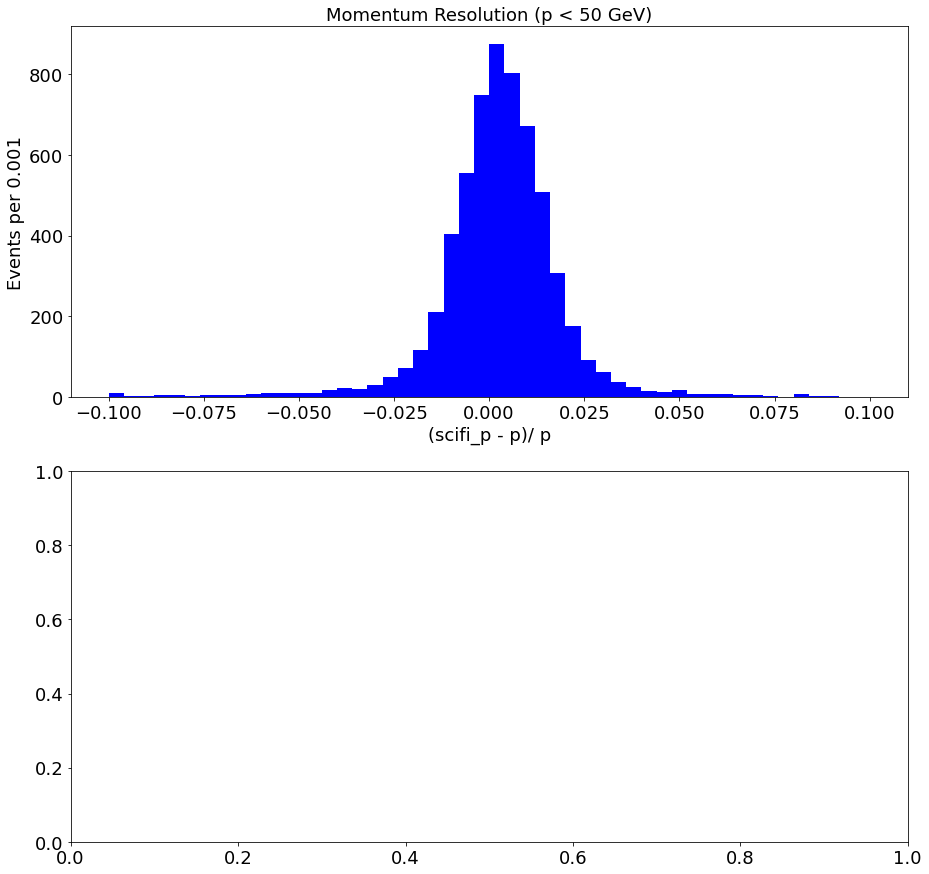

In [60]:
#only for 1d histogram
fig = plt.figure(figsize=(15,15))
axs = fig.subplots(1, 1)


ax.set_title('Momentum Resolution (p < 50 GeV)')
ax.set_xlabel('(scifi_p - p)/ p')
ax.set_ylabel('Events per 0.001')

#change font size
for i in range(0,1):
    for item in ([ax[i].title, ax[i].xaxis.label, ax[i].yaxis.label] +
             ax[i].get_xticklabels() + ax[i].get_yticklabels()):
        item.set_fontsize(18)

#plot the momentum resolution
nC, binsC, patches = axs[0].hist(p_diff, bins = 50 ,range =[-.1,.1], density=False, facecolor="b", alpha=1)

plt.show()
plt.close()

In [2]:
#starting for 2-D efficiencies
x_all = np.array(x_all).T 
y_all = np.array(y_all).T

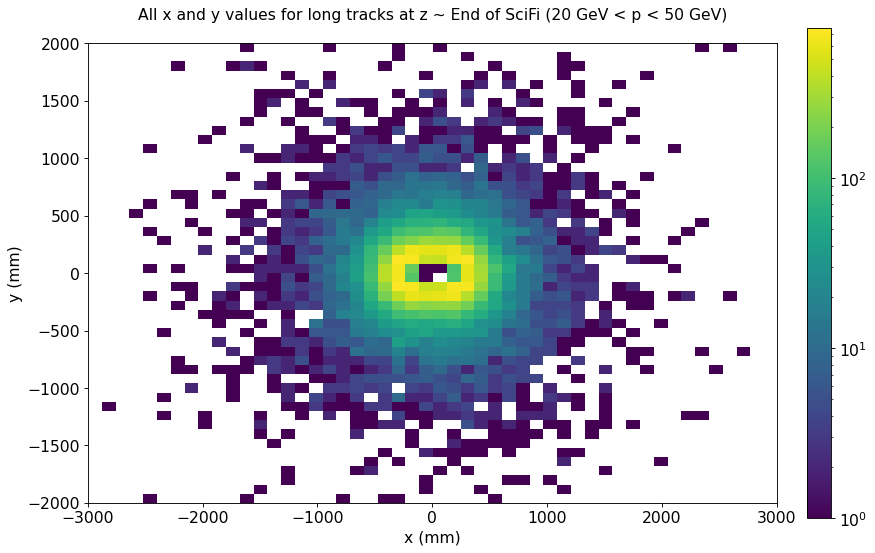

In [15]:
#create 2-D histograms for the denominator
from matplotlib.colors import LogNorm
import matplotlib.pylab as pylab

params = {'legend.fontsize': '14',
         'axes.labelsize': '14',
         'axes.titlesize':'14',
         'xtick.labelsize':'14',
         'ytick.labelsize':'14'}
pylab.rcParams.update(params)

H, xedges, yedges = np.histogram2d(x_all, y_all, bins = (50,50),range=[[-3000,3000], [-2000,2000]])

H = H.T

fig = plt.figure(figsize=(30, 30), dpi = 80)
ax = fig.add_subplot(131, xlabel='x (mm)', ylabel='y (mm)', title='All x and y values for long tracks at z ~ End of SciFi (20 GeV < p < 50 GeV)\n')
im = plt.imshow(H, interpolation='nearest', origin='lower',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], norm = LogNorm())
plt.tight_layout()

plt.colorbar(im,fraction=0.033, pad=0.04)

plt.show()
plt.close()

In [16]:
x_acc = np.array(x_acc).T
y_acc = np.array(y_acc).T

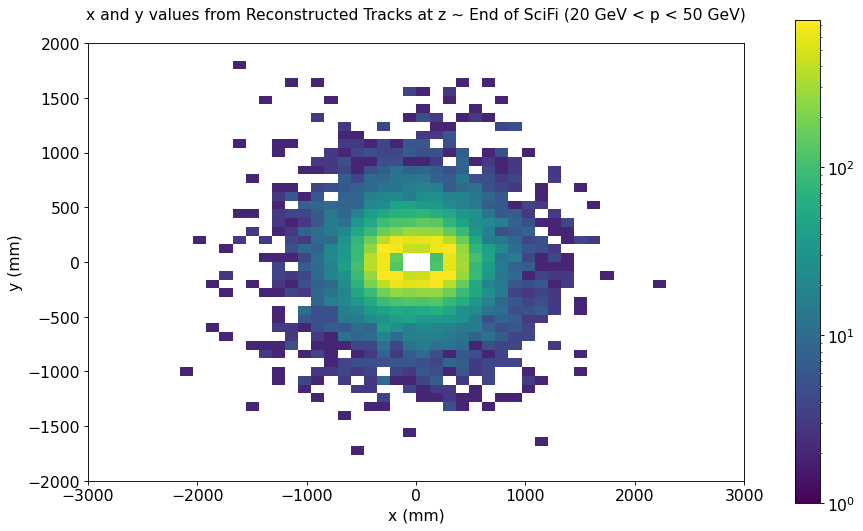

In [17]:
# create 2-D histograms for the numerator
H1, xedges1, yedges1 = np.histogram2d(x_acc, y_acc, bins = (50,50),range=[[-3000,3000], [-2000,2000]])


params = {'legend.fontsize': '14',
         'axes.labelsize': '14',
         'axes.titlesize':'14',
         'xtick.labelsize':'14',
         'ytick.labelsize':'14'}
pylab.rcParams.update(params)

H1 = H1.T

fig = plt.figure(figsize=(30, 30), dpi = 80)
ax = fig.add_subplot(131, xlabel='x (mm)', ylabel='y (mm)', title='x and y values from Reconstructed Tracks at z ~ End of SciFi (20 GeV < p < 50 GeV)\n')
im1 = plt.imshow(H1, interpolation='nearest', origin='lower',extent=[xedges1[0], xedges1[-1], yedges1[0], yedges1[-1]],norm = LogNorm())

plt.colorbar(im1,fraction=0.033, pad=0.07)
plt.tight_layout()

plt.show()
plt.close()

In [18]:
#divide the two histograms above to obtain efficiency
eff_xy = np.empty([50,50]) 

for x in range(len(H)):
    for y in range(len(H[x])):
        if H[x][y] == 0:
            z = -5
        else:
            z = H1[x][y]/H[x][y]
        eff_xy[x][y] = z

eff_xy = np.array(eff_xy)
        

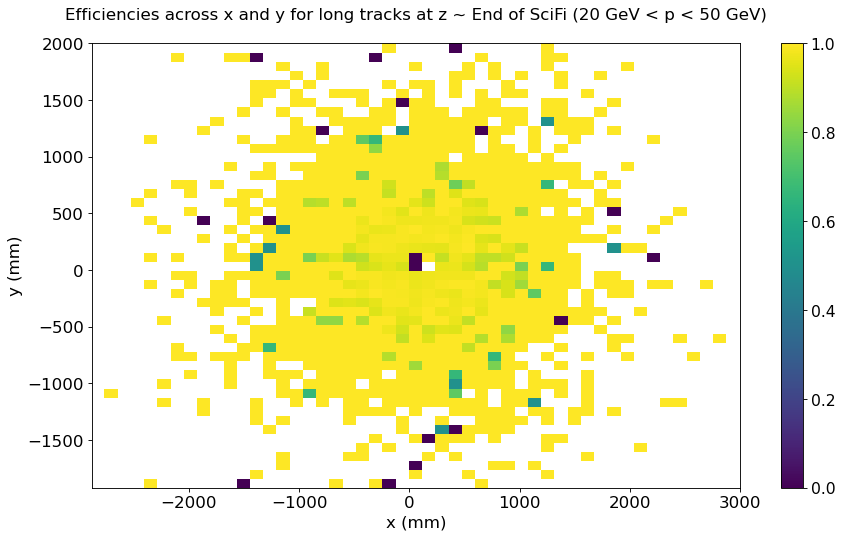

In [19]:
#plot the efficiency
fig = plt.figure(figsize=(22,25), dpi = 80)
ax = plt.subplot(421, xlabel='x (mm)', ylabel='y (mm)', title='Efficiencies across x and y for long tracks at z ~ End of SciFi (20 GeV < p < 50 GeV)\n ')


for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
            
x=np.unique(xedges[1:])
y=np.unique(yedges[1:])
X,Y = np.meshgrid(x,y)


Z= eff_xy.reshape(len(y),len(x))

my_cmap = matplotlib.cm.get_cmap()
my_cmap.set_under('w')

cm = plt.pcolormesh(X,Y,Z,cmap=my_cmap,vmin = 0)
plt.colorbar()
plt.tight_layout()




plt.show()